### Libraries

In [78]:
import math
import numpy as np

# import pandas 
# import plotly.express as px
import matplotlib.pyplot as plt

### Constants

In [79]:
# @title Gauss-Laguerre constants
# Notation: (weight, abscissa)

GAUSS_LAGUERRE = [
    (0.458964, 0.222847),
    (0.417, 1.188932),
    (0.113373, 2.992736),
    (0.0103992, 5.775144),
    (0.000261017, 9.837467),
    (0.000000898548, 15.982874)
]

# # (x_i, w_i)
# GAUSS_LAGUERRE = [
#     (0.0444894, 0.109218),
#     (0.234526, 0.210443),
#     (0.576885, 0.235213),
#     (1.07245, 0.195903),
#     (1.72241, 0.129984),
#     (2.52834, 0.0705786),
#     (3.49221, 0.0317609),
#     (4.61646, 0.0119182),
#     (5.90396, 0.00373882),
#     (7.35813, 0.000980802),
#     (8.98294, 0.000214868),
#     (10.783, 3.92066e-05),
#     (12.7637, 5.93492e-06),
#     (14.9309, 7.42726e-07),
#     (17.2933, 7.62645e-08),
#     (19.8536, 6.30627e-09),
#     (22.6358, 4.08362e-10),
#     (25.6201, 2.41194e-11),
#     (28.8739, 8.426e-13),
#     (32.3333, 3.98621e-14),
#     (36.1132, 8.8631e-16),
#     (40.1337, 1.93439e-17),
#     (44.5224, 2.36023e-19),
#     (49.2087, 1.76842e-21),
#     (54.3502, 1.54278e-23),
#     (59.8791, 5.28466e-26),
#     (65.9834, 1.38671e-28),
#     (72.6843, 1.87054e-31),
#     (80.1884, 1.18415e-34),
#     (88.7352, 2.67172e-38),
#     (98.8296, 1.338e-42),
#     (111.751, 0.0)
# ]
# GAUSS_LAGUERRE = [(i[1], i[0]) for i in GAUSS_LAGUERRE]

### Functions

##### PDF, CDF of Weibull distribution

In [80]:
# @title Weibull distribution function
# Uses Gauss-Laguerre
def f_Weibull (t, k, mu):
    f = lambda s, k : s ** (1/k)

    denomArea = 0.0
    for node in GAUSS_LAGUERRE:
        denomArea += node[0] * f(node[1], k)

    lbda = mu / denomArea

    return (k/lbda) * ((t/lbda)**(k-1)) * (math.e ** (-(t/lbda)**k))

In [81]:
# @title Integral of Weibull function
# using Gauss-Legendre; a=0, b=1
def cdf (t, k, mu):
    area = 0
    
    for node in GAUSS_LAGUERRE:
        area += node[0] * f_Weibull(t + node[1], k, mu) * math.e**node[1]

    return 1 - area

In [82]:
# @title CDF values
t_values = []
y_CDF_05 = []
y_CDF_1 = []
y_CDF_2 = []

for t in range(0, 251, 1):
    t /= 100
    t_values.append(t)
    y_CDF_05.append(cdf(t, 0.5, 2))
    y_CDF_1.append(cdf(t, 1, 1))
    y_CDF_2.append(cdf(t, 2, (math.sqrt(math.pi)/2)))

In [83]:
print(t_values)
print(y_CDF_05)
print(y_CDF_1)
print(y_CDF_2)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

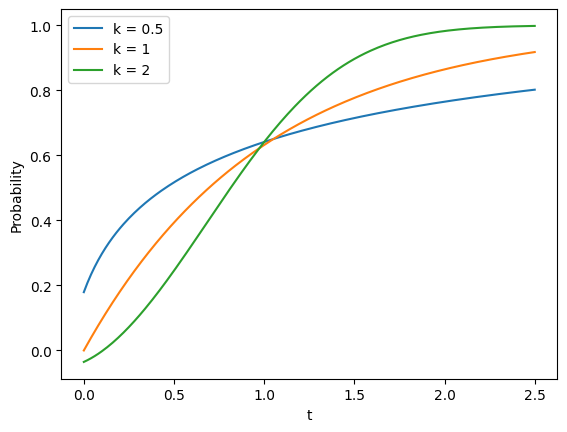

In [84]:
# @title CDF plotting
figures, axes = plt.subplots()

axes.plot(t_values, y_CDF_05, label="k = 0.5")
axes.plot(t_values, y_CDF_1, label="k = 1")
axes.plot(t_values, y_CDF_2, label="k = 2")

axes.set_xlabel("t")
axes.set_ylabel("Probability")
axes.legend()

plt.show()

##### Root-finding problem

In [85]:
# @title Inverse survivability
# solved as root-finding problem using bisection method
def surv_inv (alpha, a, b, k, mu):
    isDiffSign = lambda x1, x2 : np.sign(x1) != np.sign(x2)
    f = lambda t : cdf(t, k, mu) - alpha

    tol = 1.0e-9

    fa = f(a)
    fb = f(b)

    if fa == 0.0:
        return a
    
    if fb == 0.0:
        return b
    
    if not isDiffSign(fa, fb):
       print("---> Root not bracketed at", alpha)
       return None
    
    n = int (math.ceil (math.log(abs(b-a) / tol) / math.log(2.0)))

    for i in range(n):
        c = 0.5 * (a + b)
        fc = f(c)

        if (abs(fc) > abs(fa)) and (abs(fc) > abs(fb)):
            return None

        if fc == 0.0:
            return c

        if isDiffSign(fa, fc):
            a = c
            fa = fc
        
        elif isDiffSign(fb, fc):
            b = c
            fb = fc

    return 0.5 * (a+b)

### Evaluation

In [86]:
# Average life expectancy
mu = 78

# List for values
y_t_decr = []
y_t_cons = []
y_t_incr = []
x_values = []

In [87]:
# For alpha in (0,1) with 0.01 step
for alpha in range(1, 100, 1):
    alpha /= 100

    x_values.append(alpha)

    y_t_decr.append(surv_inv(alpha, 0, 100, 0.5, mu))
    y_t_cons.append(surv_inv(alpha, 0, 100, 1, mu))
    y_t_incr.append(surv_inv(alpha, 0, 100, 2, mu))

---> Root not bracketed at 0.01
---> Root not bracketed at 0.01
---> Root not bracketed at 0.01
---> Root not bracketed at 0.02
---> Root not bracketed at 0.02
---> Root not bracketed at 0.02
---> Root not bracketed at 0.03
---> Root not bracketed at 0.03
---> Root not bracketed at 0.03
---> Root not bracketed at 0.04
---> Root not bracketed at 0.04
---> Root not bracketed at 0.04
---> Root not bracketed at 0.05
---> Root not bracketed at 0.05
---> Root not bracketed at 0.05
---> Root not bracketed at 0.06
---> Root not bracketed at 0.06
---> Root not bracketed at 0.06
---> Root not bracketed at 0.07
---> Root not bracketed at 0.07
---> Root not bracketed at 0.07
---> Root not bracketed at 0.08
---> Root not bracketed at 0.08
---> Root not bracketed at 0.08
---> Root not bracketed at 0.09
---> Root not bracketed at 0.09
---> Root not bracketed at 0.09
---> Root not bracketed at 0.1
---> Root not bracketed at 0.1
---> Root not bracketed at 0.1
---> Root not bracketed at 0.11
---> Root n

### Plotting

In [88]:
print(x_values)
print(y_t_decr)
print(y_t_cons)
print(y_t_incr)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0,

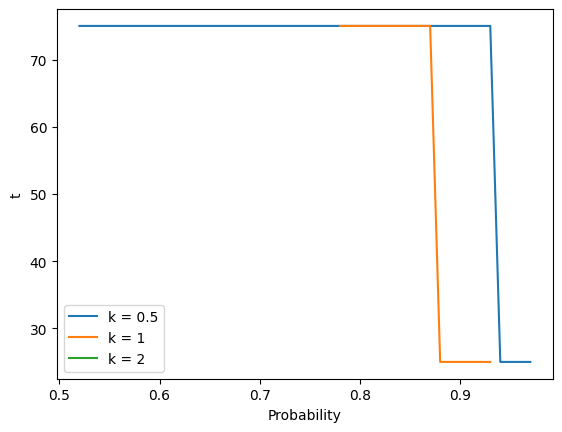

In [89]:
figures, axes = plt.subplots()

axes.plot(x_values, y_t_decr, label="k = 0.5")
axes.plot(x_values, y_t_cons, label="k = 1")
axes.plot(x_values, y_t_incr, label="k = 2")

axes.set_xlabel("Probability")
axes.set_ylabel("t")

axes.legend()

# plt.xticks(np.arange(0, 1, step=0.2))
# plt.yticks(np.arange(0, 100, step=10))

plt.show()